<a href="https://colab.research.google.com/github/Yanbelo/Aromatase/blob/main/Aromatase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

aroma = targets.target_chembl_id[0]
# Initialize ChEMBL client
activity = new_client.activity
molecule = new_client.molecule

# Function to fetch activities for a specific target
def fetch_data_for_target(target_chembl_id):
    # Fetch activity data
    res = activity.filter(target_chembl_id=target_chembl_id).filter(standard_type="IC50")
    # Convert to DataFrame
    df = pd.DataFrame.from_records(res)
    return df

# Target IDs for DPPIV and SGLT2 (example IDs, you need to find the correct ones)
aromatase = aroma


# Fetch data
aromatase = fetch_data_for_target(aromatase)


# Optionally, merge data based on compound or further processing
# Here we just print the shape of the fetched data
print("aromatase Data Shape:", aromatase.shape)


# Save to CSV
aromatase.to_csv('aromatase_activity_data.csv', index=False)



aromatase Data Shape: (3540, 46)


In [ ]:
import pandas as pd

def clean_and_select_data(df):
    """
    Clean a DataFrame by removing entries without standard values or SMILES,
    removing duplicates based on SMILES, and selecting relevant columns.

    Args:
    df (pd.DataFrame): The DataFrame to process.

    Returns:
    pd.DataFrame: A processed DataFrame with selected columns.
    """
    # Ensure the DataFrame has the necessary columns
    necessary_columns = {'standard_value', 'canonical_smiles'}
    if not necessary_columns.issubset(df.columns):
        raise ValueError(f"DataFrame is missing one of the required columns: {necessary_columns}")

    # Remove entries with missing 'standard_value' or 'canonical_smiles'
    df = df[df['standard_value'].notna()]
    df = df[df['canonical_smiles'].notna()]

    # Remove duplicate entries based on 'canonical_smiles'
    df = df.drop_duplicates(['canonical_smiles'])

    # Select specific columns
    selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
    missing_selection = [col for col in selection if col not in df.columns]
    if missing_selection:
        raise ValueError(f"DataFrame is missing columns needed for selection: {missing_selection}")

    df = df[selection]

    return df

# Example usage:
# Assuming 'data' is a pandas DataFrame loaded with your chemical data
# data = pd.read_csv('path_to_your_data.csv')
# processed_data = clean_and_select_data(data)
# print(processed_data)


In [ ]:
aromatase = clean_and_select_data(aromatase)
df= aromatase
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
2,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
3,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
4,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
5,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
3533,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0
3534,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0
3535,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8
3536,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0


In [ ]:
df.to_csv('df.csv', index=False)

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
2,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
3,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
4,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
5,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
3533,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0
3534,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0
3535,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8
3536,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0


In [ ]:
import numpy as np
import pandas as pd

def convert_to_pIC50(data, column_name='standard_value'):
    """
    Convert IC50 values from nM to pIC50.

    Parameters:
    - data: pandas DataFrame containing the IC50 values.
    - column_name: string, the column name in DataFrame where the IC50 values are stored.

    Returns:
    - pandas DataFrame with an additional column 'pIC50' containing the converted values.
    """
    # Convert IC50 from nM to M (1 nM = 1e-9 M)
    molar_values = data[column_name].astype(float) * (10**-9)

    # Calculate pIC50 values
    data['pIC50'] = -np.log10(molar_values)

    return data

# Example of loading a dataset and applying the function
file_path = 'df.csv'  # Update with the actual path
data = pd.read_csv(file_path)
data = convert_to_pIC50(data, 'standard_value')  # Assuming 'standard_values' is your column name

print(data.head())  # Display the first few rows to check the new 'pIC50' column


  molecule_chembl_id                                   canonical_smiles  \
0       CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1      CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2       CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3       CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4       CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   

   standard_value     pIC50  
0          7100.0  5.148742  
1         50000.0  4.301030  
2           238.0  6.623423  
3            57.0  7.244125  
4            54.0  7.267606  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# prompt: remove the standard_value

data = data.drop('standard_value', axis=1)
print(data.head())


  molecule_chembl_id                                   canonical_smiles  \
0       CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1      CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2       CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3       CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4       CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   

      pIC50  
0  5.148742  
1  4.301030  
2  6.623423  
3  7.244125  
4  7.267606  


In [ ]:
# prompt: creat two classes, active = 1 with pIC50 >=5 and inactive = 0 when pIC50 <=5

import numpy as np
def assign_activity_class(data, threshold=5):
  """
  Assigns activity class based on pIC50 values.

  Args:
    data: pandas DataFrame containing 'pIC50' column.
    threshold: Threshold value for pIC50 to distinguish active and inactive.

  Returns:
    pandas DataFrame with an additional 'activity_class' column.
  """
  data['activity_class'] = np.where(data['pIC50'] >= threshold, 1, 0)
  return data

data = assign_activity_class(data, threshold=5)
print(data.head())


  molecule_chembl_id                                   canonical_smiles  \
0       CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1      CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2       CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3       CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4       CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   

      pIC50  activity_class  
0  5.148742               1  
1  4.301030               0  
2  6.623423               1  
3  7.244125               1  
4  7.267606               1  


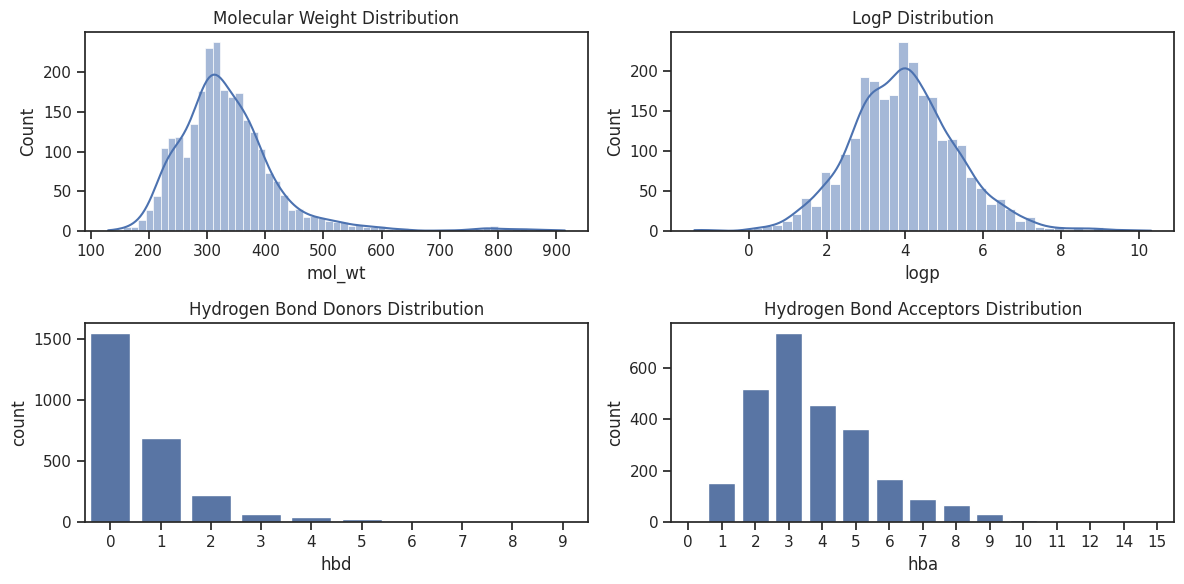

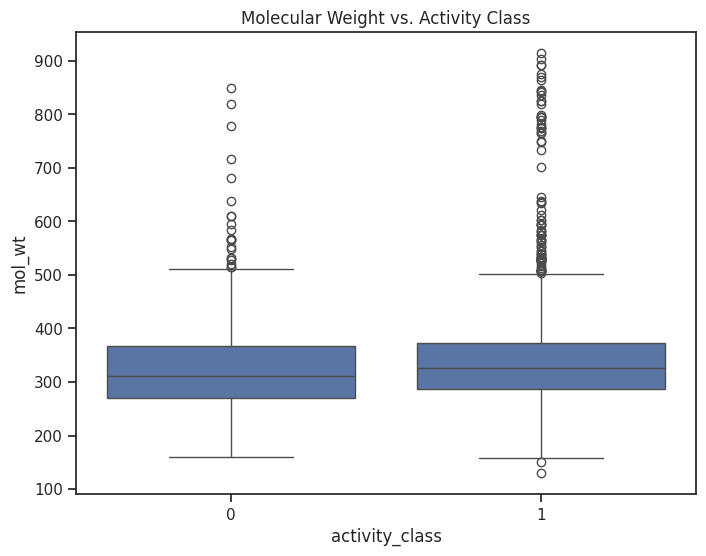

             pIC50  activity_class       mol_wt         logp          hbd  \
count  2597.000000     2597.000000  2597.000000  2597.000000  2597.000000   
mean           inf        0.791298   336.268122     3.970371     0.646515   
std            NaN        0.406459    92.892046     1.383520     1.044005   
min       2.620000        0.000000   130.078000    -1.402800     0.000000   
25%       5.050610        1.000000   284.311000     3.068700     0.000000   
50%       5.879426        1.000000   322.364000     3.926900     0.000000   
75%       6.795880        1.000000   373.334000     4.781500     1.000000   
max            inf        1.000000   914.664000    10.306000     9.000000   

               hba   violations  
count  2597.000000  2597.000000  
mean      3.721217     0.260685  
std       1.841794     0.506702  
min       0.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     0.000000  
75%       5.000000     0.000000  
max      15.000000     3.000000  


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
# prompt: exploration data analysis using Lipinski descriptors

import pandas as pd
! pip install rdkit-pypi
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

def lipinski_rule_of_five(smiles, verbose=False):
    """
    Calculates Lipinski's rule of five for a given SMILES string.

    Args:
        smiles (str): The SMILES string representing the molecule.
        verbose (bool): Whether to print the calculated descriptors. Defaults to False.

    Returns:
        tuple: A tuple containing the number of violations and a dictionary of the calculated descriptors.
    """
    from rdkit import Chem
    from rdkit.Chem import Descriptors

    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)

    violations = 0
    if mw > 500:
        violations += 1
    if logp > 5:
        violations += 1
    if hbd > 5:
        violations += 1
    if hba > 10:
        violations += 1

    descriptors = {
        'mol_wt': mw,
        'logp': logp,
        'hbd': hbd,
        'hba': hba,
        'violations': violations
    }

    if verbose:
        print("Molecular weight:", mw)
        print("LogP:", logp)
        print("Hydrogen bond donors:", hbd)
        print("Hydrogen bond acceptors:", hba)
        print("Number of violations:", violations)

    return violations, descriptors

# Apply Lipinski's rule to each molecule
lipinski_results = []
for smiles in data['canonical_smiles']:
    violations, descriptors = lipinski_rule_of_five(smiles)
    if descriptors is not None:
        lipinski_results.append(descriptors)

# Create a DataFrame from the results
lipinski_df = pd.DataFrame(lipinski_results)

# Merge Lipinski descriptors with original data
data_with_lipinski = pd.concat([data, lipinski_df], axis=1)

# Visualize distributions of descriptors
plt.figure(figsize=(12, 6))
plt.subplot(221)
sns.histplot(data_with_lipinski['mol_wt'], kde=True)
plt.title('Molecular Weight Distribution')

plt.subplot(222)
sns.histplot(data_with_lipinski['logp'], kde=True)
plt.title('LogP Distribution')

plt.subplot(223)
sns.countplot(x='hbd', data=data_with_lipinski)
plt.title('Hydrogen Bond Donors Distribution')

plt.subplot(224)
sns.countplot(x='hba', data=data_with_lipinski)
plt.title('Hydrogen Bond Acceptors Distribution')

plt.tight_layout()
plt.show()

# Analyze relationship between descriptors and activity
plt.figure(figsize=(8, 6))
sns.boxplot(x='activity_class', y='mol_wt', data=data_with_lipinski)
plt.title('Molecular Weight vs. Activity Class')
plt.show()

# Similar plots can be created for other descriptors (logp, hbd, hba)

# Print summary statistics
print(data_with_lipinski.describe())


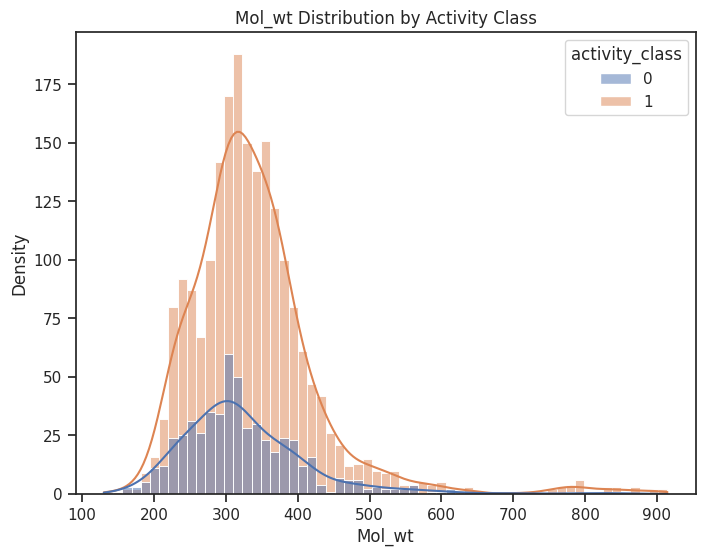

TypeError: Axes.bxp() got an unexpected keyword argument 'kde'

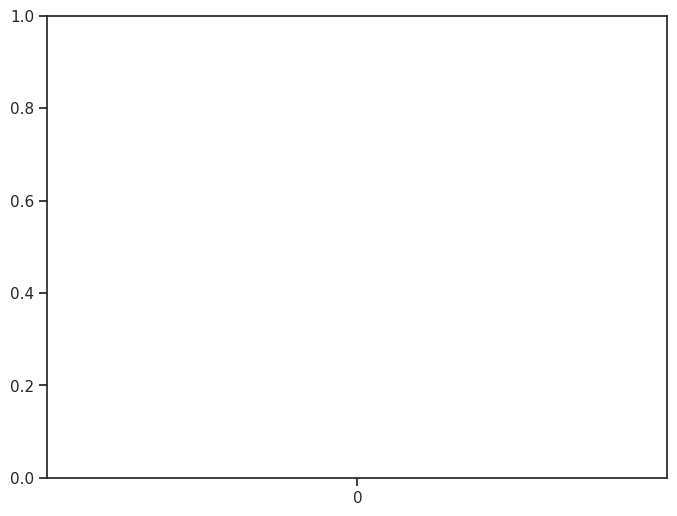

In [ ]:
# prompt: do the analysis descrptor by descriptor. use different color for activity_class. analysis for individual descriptor

import matplotlib.pyplot as plt
# Set style for plots
sns.set(style='ticks')

# Descriptors to analyze
descriptors = ['mol_wt', 'logp', 'hbd', 'hba']

# Iterate through descriptors and create plots
for descriptor in descriptors:
    # Distribution plot with activity class distinction
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_with_lipinski, x=descriptor, hue='activity_class', kde=True, common_norm=False)
    plt.title(f'{descriptor.capitalize()} Distribution by Activity Class')
    plt.xlabel(descriptor.capitalize())
    plt.ylabel('Density')
    plt.show()

    # Box plot for comparing descriptor distribution across activity classes
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='activity_class', y=descriptor, data=data_with_lipinski,hue='activity_class', kde=True)
    plt.title(f'{descriptor.capitalize()} vs. Activity Class')
    plt.xlabel('Activity Class')
    plt.ylabel(descriptor.capitalize())
    plt.show()

    # Violin plot for a more detailed view of descriptor distribution
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='activity_class', y=descriptor, data=data_with_lipinski, inner='quartile')
    plt.title(f'{descriptor.capitalize()} Distribution by Activity Class (Violin Plot)')
    plt.xlabel('Activity Class')
    plt.ylabel(descriptor.capitalize())
    plt.show()

    # Print summary statistics for the descriptor grouped by activity class
    print(f"Summary Statistics for {descriptor.capitalize()} by Activity Class:")
    print(data_with_lipinski.groupby('activity_class')[descriptor].describe())
    print("\n")


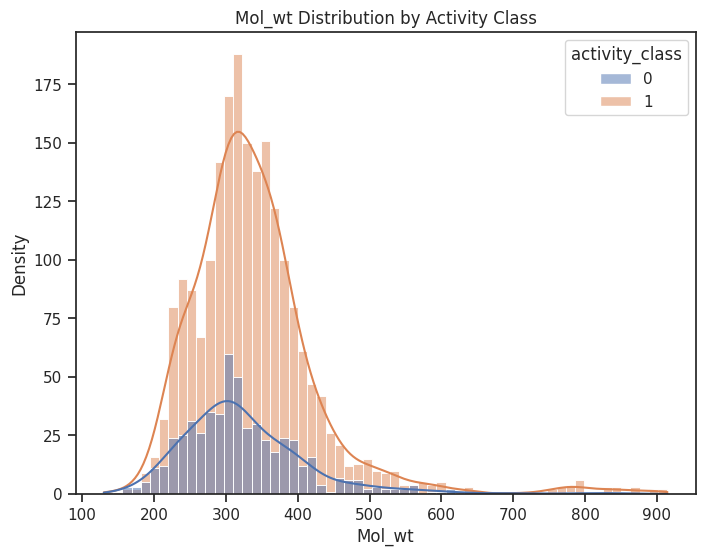

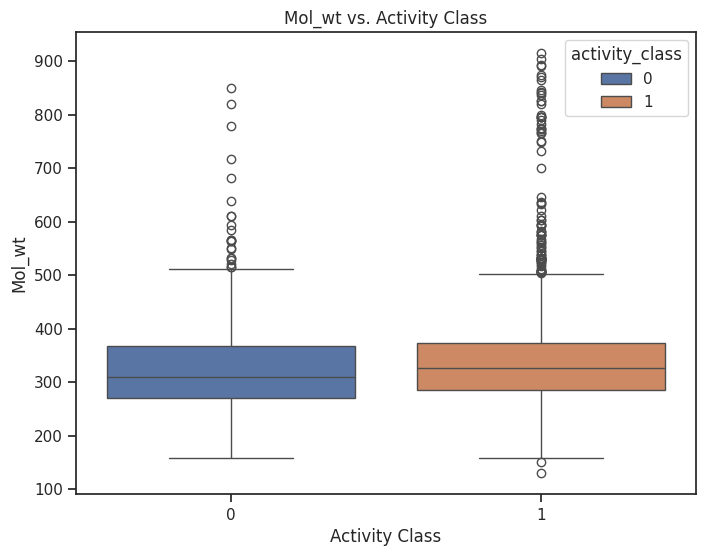

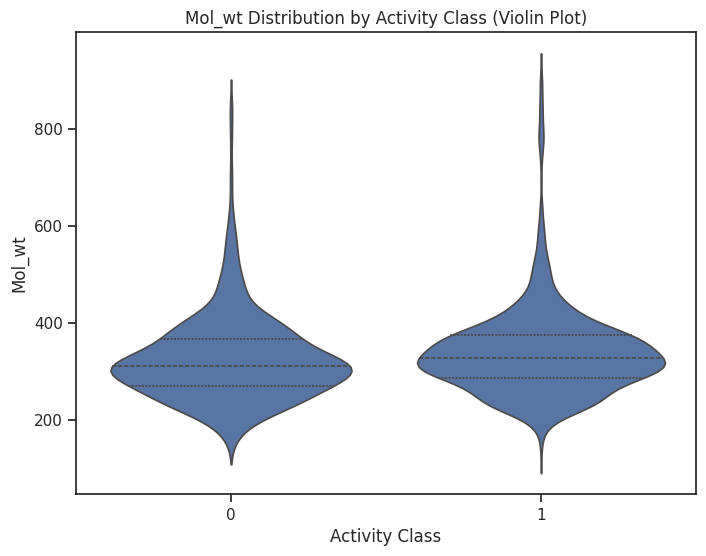

Summary Statistics for Mol_wt by Activity Class:
                 count        mean        std      min      25%      50%  \
activity_class                                                             
0                542.0  325.514522  90.105958  159.188  270.328  310.349   
1               2055.0  339.104351  93.428363  130.078  286.375  326.469   

                    75%      max  
activity_class                    
0               367.198  849.879  
1               373.496  914.664  




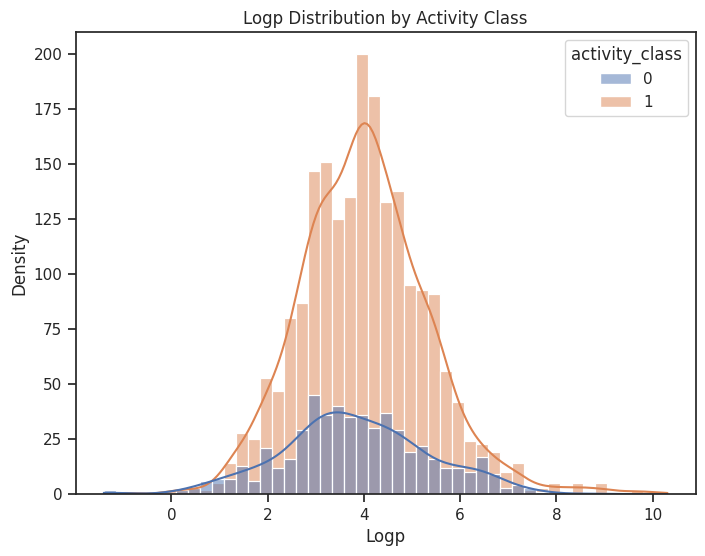

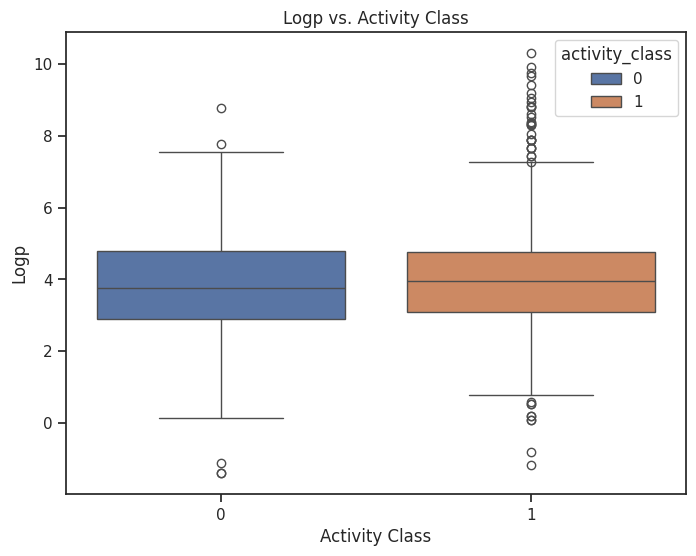

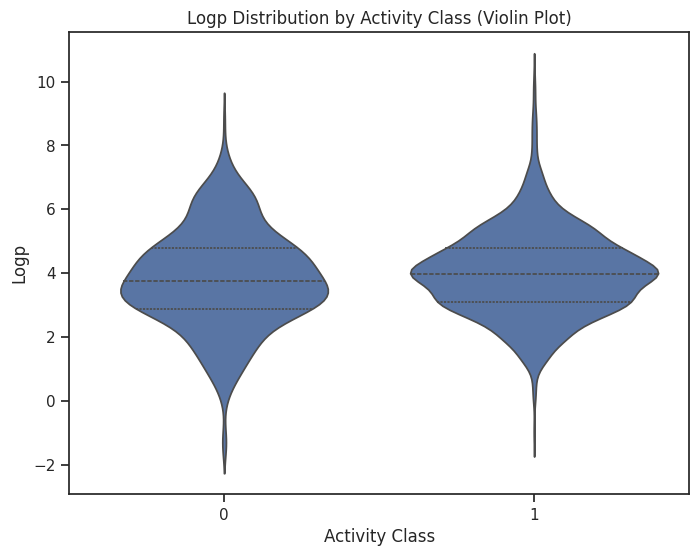

Summary Statistics for Logp by Activity Class:
                 count      mean       std     min       25%     50%      75%  \
activity_class                                                                  
0                542.0  3.824890  1.530965 -1.4028  2.886425  3.7483  4.79949   
1               2055.0  4.008742  1.339708 -1.1652  3.104900  3.9671  4.77670   

                     max  
activity_class            
0                8.78068  
1               10.30600  




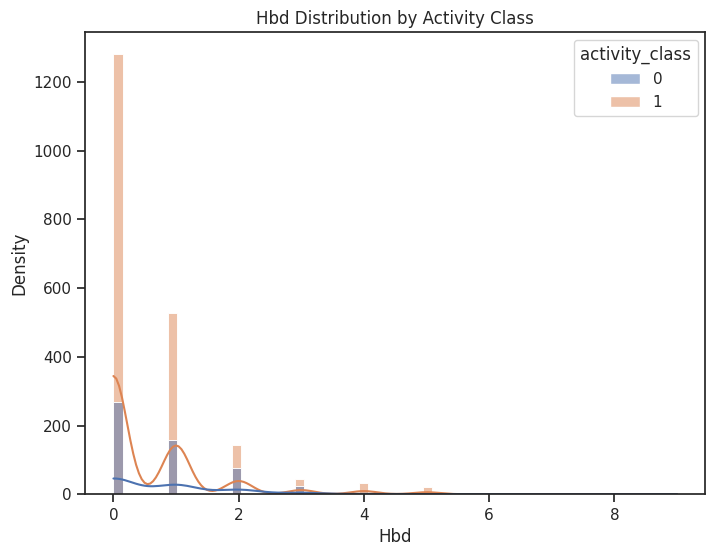

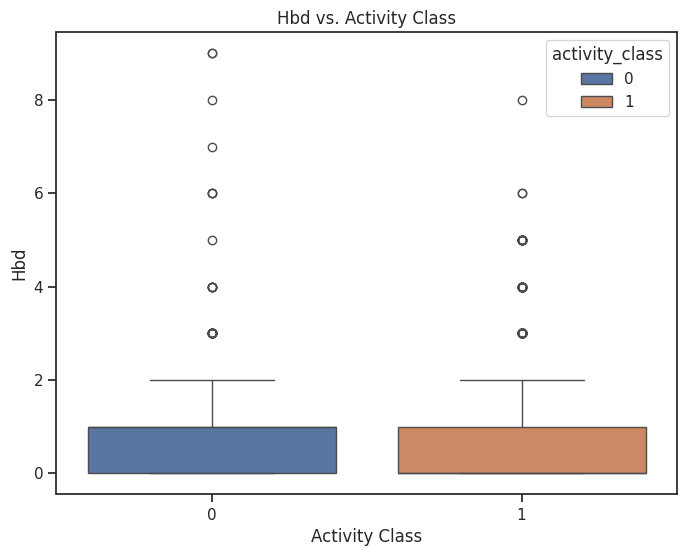

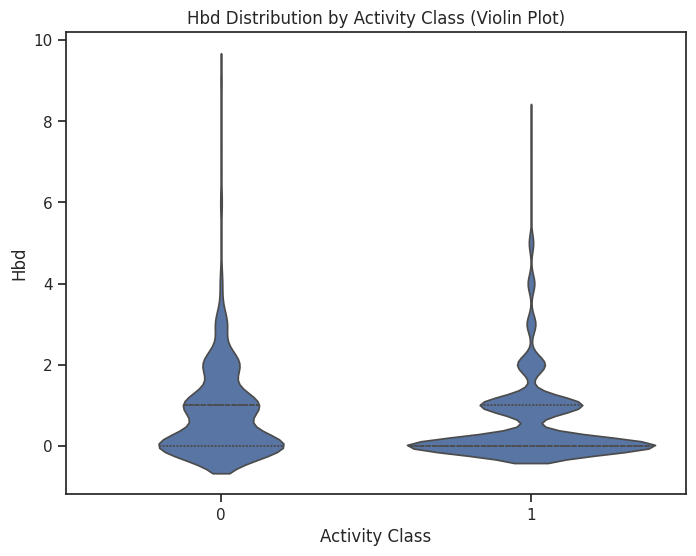

Summary Statistics for Hbd by Activity Class:
                 count      mean       std  min  25%  50%  75%  max
activity_class                                                     
0                542.0  0.856089  1.202873  0.0  0.0  1.0  1.0  9.0
1               2055.0  0.591241  0.990864  0.0  0.0  0.0  1.0  8.0




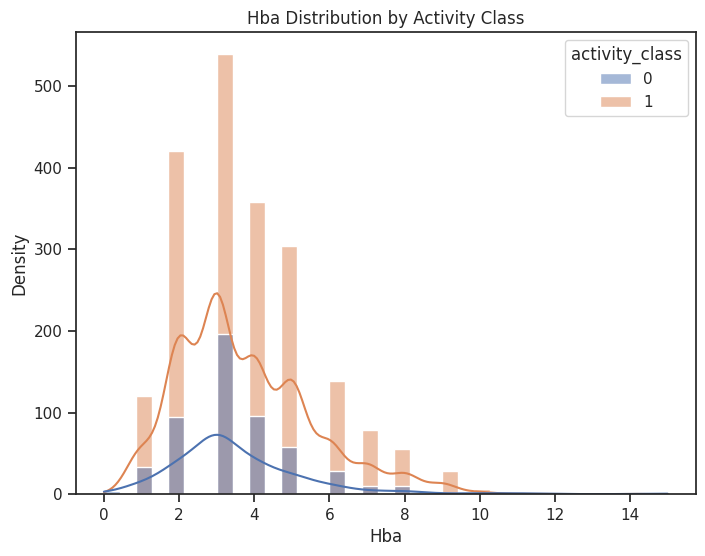

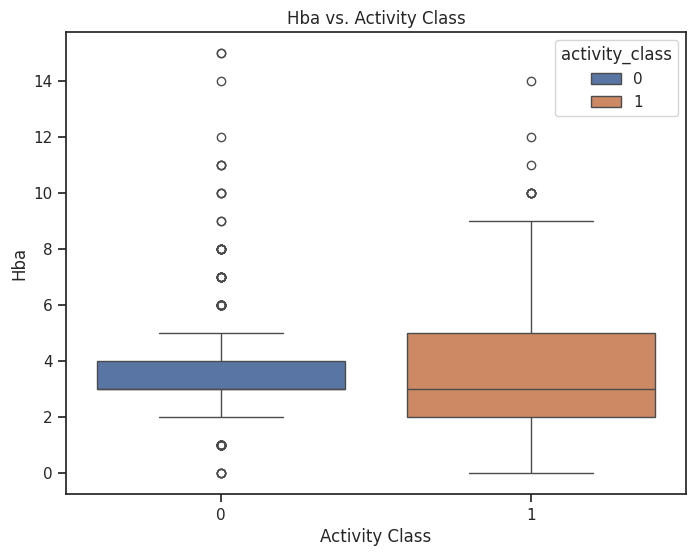

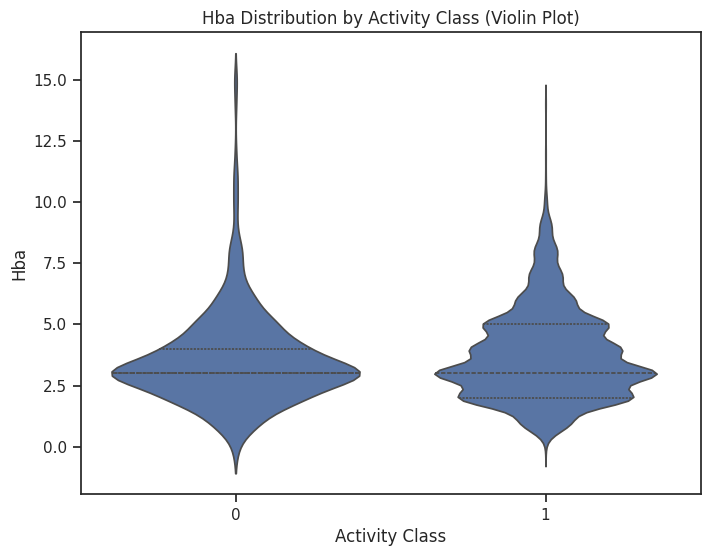

Summary Statistics for Hba by Activity Class:
                 count      mean       std  min  25%  50%  75%   max
activity_class                                                      
0                542.0  3.579336  1.909258  0.0  3.0  3.0  4.0  15.0
1               2055.0  3.758637  1.822221  0.0  2.0  3.0  5.0  14.0




In [ ]:
# prompt: do the analysis descrptor by descriptor. use different color for activity_class. analysis for individual descriptor

import matplotlib.pyplot as plt
# Set style for plots
sns.set(style='ticks')

# Descriptors to analyze
descriptors = ['mol_wt', 'logp', 'hbd', 'hba']

# Iterate through descriptors and create plots
for descriptor in descriptors:
    # Distribution plot with activity class distinction
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_with_lipinski, x=descriptor, hue='activity_class', kde=True, common_norm=False)
    plt.title(f'{descriptor.capitalize()} Distribution by Activity Class')
    plt.xlabel(descriptor.capitalize())
    plt.ylabel('Density')
    plt.show()

    # Box plot for comparing descriptor distribution across activity classes
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='activity_class', y=descriptor, data=data_with_lipinski,hue='activity_class') # Removed kde=True
    plt.title(f'{descriptor.capitalize()} vs. Activity Class')
    plt.xlabel('Activity Class')
    plt.ylabel(descriptor.capitalize())
    plt.show()

    # Violin plot for a more detailed view of descriptor distribution
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='activity_class', y=descriptor, data=data_with_lipinski, inner='quartile')
    plt.title(f'{descriptor.capitalize()} Distribution by Activity Class (Violin Plot)')
    plt.xlabel('Activity Class')
    plt.ylabel(descriptor.capitalize())
    plt.show()

    # Print summary statistics for the descriptor grouped by activity class
    print(f"Summary Statistics for {descriptor.capitalize()} by Activity Class:")
    print(data_with_lipinski.groupby('activity_class')[descriptor].describe())
    print("\n")

In [ ]:
# prompt: use a PCA for exploration data analysis

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract numerical features for PCA
numerical_features = ['mol_wt', 'logp', 'hbd', 'hba', 'pIC50']
X = data_with_lipinski[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Add activity class to the PCA DataFrame
pca_df['activity_class'] = data_with_lipinski['activity_class']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Scatter plot of PC1 vs PC2 colored by activity class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='activity_class', data=pca_df, alpha=0.8)
plt.title('PCA: PC1 vs. PC2 Colored by Activity Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# You can create similar scatter plots for other pairs of principal components as needed.


ValueError: Input X contains infinity or a value too large for dtype('float64').

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
<ipython-input-36-0d3fb112f89b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-36-0d3fb112f89b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True) # Or any other suitable imputation strategy


            mol_wt         logp          hbd          hba        pIC50
count  2597.000000  2597.000000  2597.000000  2597.000000  2597.000000
mean    336.268122     3.970371     0.646515     3.721217          inf
std      92.892046     1.383520     1.044005     1.841794          NaN
min     130.078000    -1.402800     0.000000     0.000000     2.620000
25%     284.311000     3.068700     0.000000     2.000000     5.050610
50%     322.364000     3.926900     0.000000     3.000000     5.879426
75%     373.334000     4.781500     1.000000     5.000000     6.795880
max     914.664000    10.306000     9.000000    15.000000          inf
mol_wt    0
logp      0
hbd       0
hba       0
pIC50     1
dtype: int64
Explained Variance Ratio: [0.36537289 0.27848502 0.21008702 0.12619288 0.01986219]


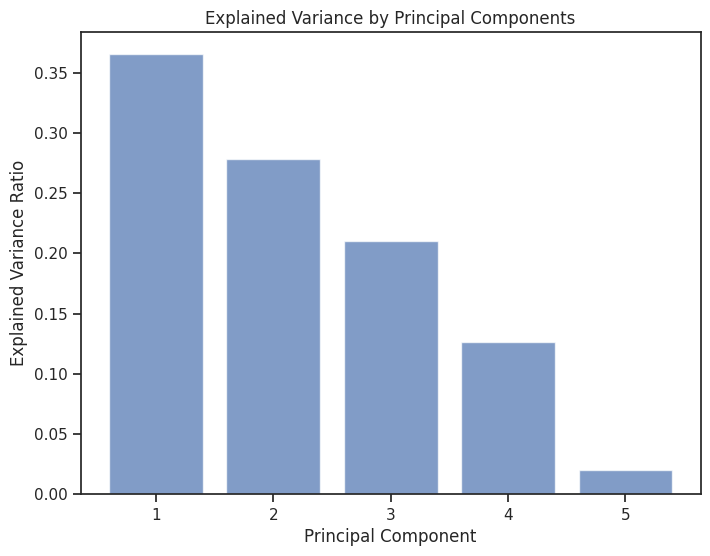

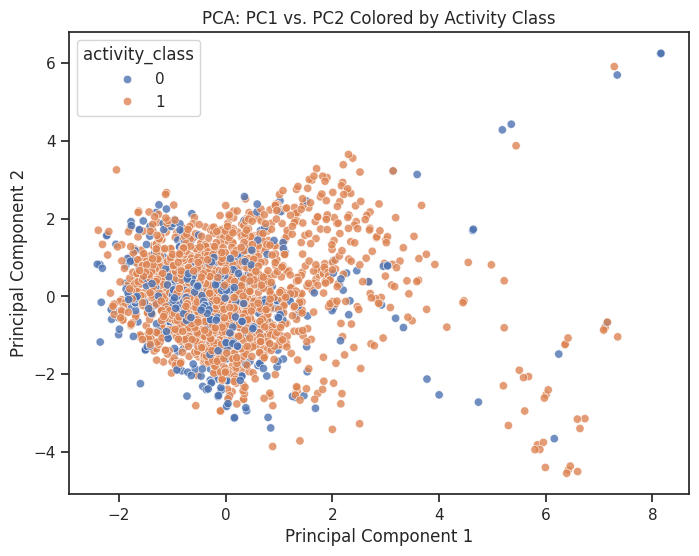

In [ ]:
# prompt: use a PCA for exploration data analysis

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract numerical features for PCA
numerical_features = ['mol_wt', 'logp', 'hbd', 'hba', 'pIC50']
X = data_with_lipinski[numerical_features]

# Check for infinite or very large values
print(X.describe()) # Check for unusually large values or infinite values
print(np.isinf(X).sum()) # Check for infinite values

# Replace infinite values with NaN and then fill NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True) # Or any other suitable imputation strategy

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Add activity class to the PCA DataFrame
pca_df['activity_class'] = data_with_lipinski['activity_class']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Scatter plot of PC1 vs PC2 colored by activity class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='activity_class', data=pca_df, alpha=0.8)
plt.title('PCA: PC1 vs. PC2 Colored by Activity Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# You can create similar scatter plots for other pairs of principal components as needed.

In [ ]:
# prompt: add more molecular descriptors

import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.EState import Fingerprinter as EStateFingerprinter
import pubchempy as pcp
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from rdkit.Chem import Crippen


# Load the dataset
data['mol'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

# Define fingerprint functions
def get_atom_pair_fp(mol):
    return list(rdFingerprintGenerator.GetAtomPairGenerator().GetCountFingerprint(mol))

def get_maccs_keys(mol):
    return list(AllChem.GetMACCSKeysFingerprint(mol))

def get_2d_atom_pair_fp(mol):
  return list(rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol))

def get_cdk_fp(mol):
  return list(rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol))

def get_cdk_extended_fp(mol):
  return list(Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048))

def get_cdk_graph_fp(mol):
  return list(Chem.RDKFingerprint(mol))

def get_circle_fp(mol):
  return list(rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048))

def get_estate_fp(mol):
    fp = EStateFingerprinter.FingerprintMol(mol)
    return list(np.concatenate(fp))

def get_hybrid_fp(mol):
  return list(rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, useChirality=True, nBits=2048))

def get_klekota_roth_fp(mol):
  return list(rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=2048))

def get_pubchem_fp(mol):
    smiles = Chem.MolToSmiles(mol)
    compound = pcp.get_compounds(smiles, 'smiles')[0]
    fingerprint = compound.cactvs_fingerprint
    return np.array([int(bit) for bit in fingerprint])

# More fingerprint functions should be defined here based on your requirements
def get_tpsa(mol):
  return rdMolDescriptors.CalcTPSA(mol)

def get_logp(mol):
  return Crippen.MolLogP(mol)  # Change this line

def get_mw(mol):
  return rdMolDescriptors.CalcExactMolWt(mol)

def get_rotatable_bonds(mol):
  return rdMolDescriptors.CalcNumRotatableBonds(mol)

def get_hba(mol):
  return rdMolDescriptors.CalcNumHBA(mol)

def get_hbd(mol):
  return rdMolDescriptors.CalcNumHBD(mol)

def get_num_rings(mol):
  return rdMolDescriptors.CalcNumRings(mol)


fingerprint_functions = {
    'AtomPair': get_atom_pair_fp,
    'MACCS': get_maccs_keys,
    '2D Atom Pair': get_2d_atom_pair_fp,
    'CDK': get_cdk_fp,
    'CDK Extended': get_cdk_extended_fp,
    'CDK Graph': get_cdk_graph_fp,
    'Circle': get_circle_fp,
    'Estate': get_estate_fp,
    'Hybrid': get_hybrid_fp,
    'Klekota-Roth': get_klekota_roth_fp,
    'Pubchem': get_pubchem_fp,
    # Add other fingerprints as per your list
    'TPSA': get_tpsa,
    'LogP': get_logp,
    'MW': get_mw,
    'Rotatable Bonds': get_rotatable_bonds,
    'HBA': get_hba,
    'HBD': get_hbd,
    'Num Rings': get_num_rings
}

# Generate fingerprints
for name, func in fingerprint_functions.items():
    data[name] = data['mol'].apply(func)
# Define machine learning models
models = {
    'RF': RandomForestClassifier(),
    'ADA': AdaBoostClassifier(),
    'LGBM': lgb.LGBMClassifier(),
    'DT': DecisionTreeClassifier(),
    'ET': ExtraTreesClassifier(),
    'XGB': xgb.XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'LR': LogisticRegression(),
    'SVMLN': SVC(kernel='linear', probability=True), # Enable probability estimates for SVM models
    'SVMRBF': SVC(kernel='rbf', probability=True),   # Enable probability estimates for SVM models
    'MLP': MLPClassifier(),
    'NB': GaussianNB(),
    #
}

# Train and evaluate models
results_accuracy = {}
results_sensitivity = {}
results_specificity = {}
results_mcc = {}
results_auc = {}

for fp_name in fingerprint_functions.keys():
    results_accuracy[fp_name] = {}
    results_sensitivity[fp_name] = {}
    results_specificity[fp_name] = {}
    results_mcc[fp_name] = {}
    results_auc[fp_name] = {}
    X = np.array(list(data[fp_name]))
    if X.ndim == 1:
        X = X.reshape(len(data), -1)
    y = data['class'].values
    for model_name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC

        accuracy = accuracy_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        mcc = matthews_corrcoef(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        results_accuracy[fp_name][model_name] = accuracy
        results_sensitivity[fp_name][model_name] = sensitivity
        results_specificity[fp_name][model_name] = specificity
        results_mcc[fp_name][model_name] = mcc
        results_auc[fp_name][model_name] = auc

        print(f'Fingerprint: {fp_name}, Model: {model_name}, Accuracy: {accuracy}, Sensitivity: {sensitivity}, Specificity: {specificity}, MCC: {mcc}, AUC: {auc}')

# Create DataFrames from the results
df_accuracy = pd.DataFrame(results_accuracy)
df_sensitivity = pd.DataFrame(results_sensitivity)
df_specificity = pd.DataFrame(results_specificity)
df_mcc = pd.DataFrame(results_mcc)
df_auc = pd.DataFrame(results_auc)

# Print the DataFrames
print("Accuracy:")
print(df_accuracy)
print("\nSensitivity:")
print(df_sensitivity)
print("\nSpecificity:")
print(df_specificity)
print("\nMCC:")
print(df_mcc)
print("\nAUC:")
print(df_auc)


ModuleNotFoundError: No module named 'rdkit'